In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import os as csv

# Study data files
Insurance_path = ("../Insurance Data/Health_insurance.csv")
County_results_path = ("../Insurance Data/County_cases.csv")
# Read the data
Insurance_results = pd.read_csv(Insurance_path)
County_results = pd.read_csv(County_results_path)
Insurance_results.head()

,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,B27010_004E,B27010_004M,B27010_020E,B27010_020M,B27010_036E,...,DP03_0098E,DP03_0098M,DP03_0099E,DP03_0099M,DP03_0100E,DP03_0100M,DP03_0101E,DP03_0101M,DP03_0099PE,DP03_0099PM
0,1,0500000US01001,Autauga County,Alabama,1001,6247,723,6248,498,12131,...,18191,965,3875,508,14134,125,322,143,7.1,0.9
1,2,0500000US01003,Baldwin County,Alabama,1003,22820,1479,17847,982,45216,...,72322,1864,20864,1646,48048,391,1978,546,10.2,0.8
2,3,0500000US01005,Barbour County,Alabama,1005,1385,206,1598,264,3712,...,11508,467,2558,363,5706,82,174,102,11.2,1.6
3,4,0500000US01007,Bibb County,Alabama,1007,2509,471,2247,433,4680,...,7748,761,1619,396,4859,57,86,64,7.9,1.9
4,5,0500000US01009,Blount County,Alabama,1009,7016,569,6396,483,12444,...,19752,939,6303,732,14057,144,914,313,11.0,1.3


In [2]:

County_results.head()

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-09-23 23:23:49 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,1715,3106.88,25,45.29
1,2020-09-23 23:23:49 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,5141,2470.36,49,23.55
2,2020-09-23 23:23:49 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,851,3300.75,7,27.15
3,2020-09-23 23:23:49 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,638,2832.16,10,44.39
4,2020-09-23 23:23:49 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1580,2740.91,15,26.02


In [3]:
Insurance_results.shape

(3220, 84)

In [4]:
# Create a clean DataFrame by dropping all columns except 
clean_Insurance_results_df=Insurance_results[["GEO_NAME", "GEO_PARENT_NAME","DP03_0099PE","DP03_0099PM"]]
clean_Insurance_results_df.head()

,GEO_NAME,GEO_PARENT_NAME,DP03_0099PE,DP03_0099PM
0,Autauga County,Alabama,7.1,0.9
1,Baldwin County,Alabama,10.2,0.8
2,Barbour County,Alabama,11.2,1.6
3,Bibb County,Alabama,7.9,1.9
4,Blount County,Alabama,11.0,1.3


In [5]:
Insurance_df = clean_Insurance_results_df.rename(columns={"GEO_NAME":"GEO_NAME","GEO_PARENT_NAME":"GEO_PARENT_NAME",
                                                          "DP03_0099PE":"Percent of Population with No Health Insurance Coverage","DP03_0099PM":"Percent of Population with No Health Insurance Coverage *margin of error"})
Insurance_df

,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error
0,Autauga County,Alabama,7.1,0.9
1,Baldwin County,Alabama,10.2,0.8
2,Barbour County,Alabama,11.2,1.6
3,Bibb County,Alabama,7.9,1.9
4,Blount County,Alabama,11.0,1.3
...,...,...,...,...
3215,Villalba Municipio,Puerto Rico,4.8,1.4
3216,Yabucoa Municipio,Puerto Rico,5.0,1.1
3217,Yauco Municipio,Puerto Rico,5.3,1.5
3218,Kalawao County,Hawaii,2.9,3.5


In [6]:
Insurance_df['county_name'] = Insurance_df['GEO_NAME'].str.split(' ', 1, expand=True)[0]
Insurance_df.head()

,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error,county_name
0,Autauga County,Alabama,7.1,0.9,Autauga
1,Baldwin County,Alabama,10.2,0.8,Baldwin
2,Barbour County,Alabama,11.2,1.6,Barbour
3,Bibb County,Alabama,7.9,1.9,Bibb
4,Blount County,Alabama,11.0,1.3,Blount


In [7]:
Insurance_df["county_name_long"] = Insurance_df["county_name"] + ", " + Insurance_df["GEO_PARENT_NAME"] + ", US"
Insurance_df.head()

,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error,county_name,county_name_long
0,Autauga County,Alabama,7.1,0.9,Autauga,"Autauga, Alabama, US"
1,Baldwin County,Alabama,10.2,0.8,Baldwin,"Baldwin, Alabama, US"
2,Barbour County,Alabama,11.2,1.6,Barbour,"Barbour, Alabama, US"
3,Bibb County,Alabama,7.9,1.9,Bibb,"Bibb, Alabama, US"
4,Blount County,Alabama,11.0,1.3,Blount,"Blount, Alabama, US"


In [8]:
# Combine the data into a single dataset
merged = pd.merge(County_results,Insurance_df,on="county_name_long",how='inner')

# Display the data table for preview


merged.shape

(2971, 19)

In [9]:
# Display the data table for preview

merged.head()

,last_update,location_type,state,county_name_x,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error,county_name_y
0,2020-09-23 23:23:49 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,1715,3106.88,25,45.29,Autauga County,Alabama,7.1,0.9,Autauga
1,2020-09-23 23:23:49 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,5141,2470.36,49,23.55,Baldwin County,Alabama,10.2,0.8,Baldwin
2,2020-09-23 23:23:49 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,851,3300.75,7,27.15,Barbour County,Alabama,11.2,1.6,Barbour
3,2020-09-23 23:23:49 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,638,2832.16,10,44.39,Bibb County,Alabama,7.9,1.9,Bibb
4,2020-09-23 23:23:49 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1580,2740.91,15,26.02,Blount County,Alabama,11.0,1.3,Blount


In [10]:
merged_data = merged.dropna(subset=["confirmed_per_100000", "deaths_per_100000","Percent of Population with No Health Insurance Coverage","Percent of Population with No Health Insurance Coverage"])
merged_data

,last_update,location_type,state,county_name_x,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,GEO_NAME,GEO_PARENT_NAME,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error,county_name_y
0,2020-09-23 23:23:49 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,1715,3106.88,25,45.29,Autauga County,Alabama,7.1,0.9,Autauga
1,2020-09-23 23:23:49 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,5141,2470.36,49,23.55,Baldwin County,Alabama,10.2,0.8,Baldwin
2,2020-09-23 23:23:49 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,851,3300.75,7,27.15,Barbour County,Alabama,11.2,1.6,Barbour
3,2020-09-23 23:23:49 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,638,2832.16,10,44.39,Bibb County,Alabama,7.9,1.9,Bibb
4,2020-09-23 23:23:49 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1580,2740.91,15,26.02,Blount County,Alabama,11.0,1.3,Blount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,2020-09-23 23:23:49 UTC,county,Wyoming,Sweetwater,"Sweetwater, Wyoming, US",56037.0,41.659439,-108.882788,Micropolitan,44117.0,326,738.94,2,4.53,Sweetwater County,Wyoming,12.0,1.8,Sweetwater
2967,2020-09-23 23:23:49 UTC,county,Wyoming,Teton,"Teton, Wyoming, US",56039.0,43.935225,-110.589080,Micropolitan,23059.0,517,2242.07,1,4.34,Teton County,Wyoming,10.0,2.6,Teton
2968,2020-09-23 23:23:49 UTC,county,Wyoming,Uinta,"Uinta, Wyoming, US",56041.0,41.287818,-110.547578,Micropolitan,20609.0,342,1659.47,2,9.70,Uinta County,Wyoming,12.2,2.2,Uinta
2969,2020-09-23 23:23:49 UTC,county,Wyoming,Washakie,"Washakie, Wyoming, US",56043.0,43.904516,-107.680187,Non-core,8129.0,113,1390.08,6,73.81,Washakie County,Wyoming,15.4,3.1,Washakie


In [11]:
print(merged_data['county_name_x'].value_counts())
print(merged_data['county_name_y'].value_counts())


Washington    30
Jefferson     28
Franklin      26
Jackson       24
Lincoln       24
              ..
Hatillo        1
Nodaway        1
Mellette       1
Elko           1
Orocovis       1
Name: county_name_x, Length: 1686, dtype: int64
Washington    30
Jefferson     28
Franklin      26
Jackson       24
Lincoln       24
              ..
Hatillo        1
Nodaway        1
Mellette       1
Elko           1
Orocovis       1
Name: county_name_y, Length: 1686, dtype: int64


In [12]:
# Save clean merged data into a csv file
merged_data.to_csv("../Insurance Data/covidinsurance.csv", encoding='utf-8', index = False)

In [13]:
merged_data['county_name_long'].value_counts()

Franklin, Virginia, US        2
Baltimore, Maryland, US       2
Roanoke, Virginia, US         2
Jefferson, Louisiana, US      2
Manassas, Virginia, US        2
                             ..
Worth, Missouri, US           1
Burlington, New Jersey, US    1
Shelby, Alabama, US           1
Montgomery, Tennessee, US     1
Jenkins, Georgia, US          1
Name: county_name_long, Length: 2955, dtype: int64

In [14]:
Group1_df=merged_data[["state", "deaths_per_100000","Percent of Population with No Health Insurance Coverage"]]
Group1_df.head()

,state,deaths_per_100000,Percent of Population with No Health Insurance Coverage
0,Alabama,45.29,7.1
1,Alabama,23.55,10.2
2,Alabama,27.15,11.2
3,Alabama,44.39,7.9
4,Alabama,26.02,11.0


In [15]:
Grouped = Group1_df.groupby(["state"]).count()["deaths_per_100000"]
Grouped

state
Alabama            66
Alaska             15
Arizona            13
Arkansas           71
California         44
Colorado           55
Connecticut         6
Delaware            2
Florida            62
Georgia           156
Hawaii              4
Idaho              41
Illinois           98
Indiana            91
Iowa               93
Kansas            105
Kentucky          119
Louisiana          46
Maine              16
Maryland           20
Massachusetts      12
Michigan           78
Minnesota          77
Mississippi        81
Missouri          106
Montana            48
Nebraska           89
Nevada             15
New Hampshire      10
New Jersey         20
New Mexico         26
New York           60
North Carolina     99
North Dakota       50
Ohio               87
Oklahoma           75
Oregon             35
Pennsylvania       67
Puerto Rico        50
Rhode Island        5
South Carolina     46
South Dakota       62
Tennessee          93
Texas             237
Utah                5
Verm

In [16]:
Group2_df=merged_data[["county_name_x","state", "deaths_per_100000","Percent of Population with No Health Insurance Coverage"]]
                       
Group2_df.head()

,county_name_x,state,deaths_per_100000,Percent of Population with No Health Insurance Coverage
0,Autauga,Alabama,45.29,7.1
1,Baldwin,Alabama,23.55,10.2
2,Barbour,Alabama,27.15,11.2
3,Bibb,Alabama,44.39,7.9
4,Blount,Alabama,26.02,11.0


In [17]:
County_Alabama_df = Group2_df.loc[Group2_df["state"] == "Alabama",:]
County_Alabama_df

,county_name_x,state,deaths_per_100000,Percent of Population with No Health Insurance Coverage
0,Autauga,Alabama,45.29,7.1
1,Baldwin,Alabama,23.55,10.2
2,Barbour,Alabama,27.15,11.2
3,Bibb,Alabama,44.39,7.9
4,Blount,Alabama,26.02,11.0
...,...,...,...,...
61,Tuscaloosa,Alabama,56.25,7.5
62,Walker,Alabama,128.70,11.0
63,Washington,Alabama,78.11,9.6
64,Wilcox,Alabama,101.77,11.6


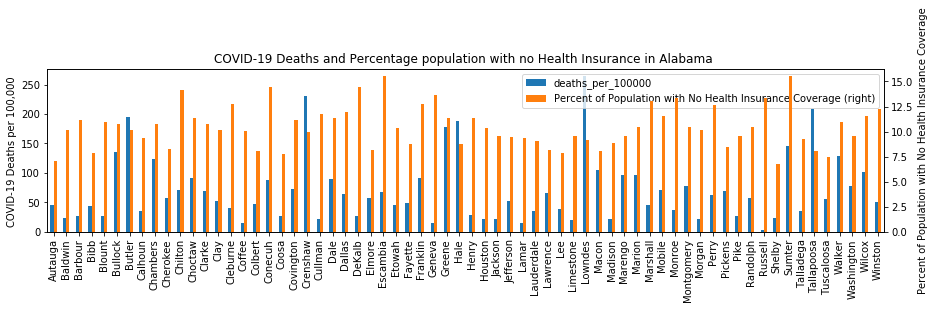

In [18]:
County_Alabama_df.plot.bar(figsize=(15, 3),secondary_y= 'Percent of Population with No Health Insurance Coverage')
x_axis = np.arange(len(County_Alabama_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,County_Alabama_df["county_name_x"], rotation="vertical")
ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
ax1.set_ylabel('COVID-19 Deaths per 100,000 ')
ax2.set_ylabel('Percent of Population with No Health Insurance Coverage')
plt.title("COVID-19 Deaths and Percentage population with no Health Insurance in Alabama ")
plt.savefig("../Insurance Images/COVID-19 Deaths vs. No Health Insurance(%) Alabama Bar chart.png",bbox_inches="tight")

In [19]:
County_NewYork_df = Group2_df.loc[Group2_df["state"] == "New York",:]
County_NewYork_df

,county_name_x,state,deaths_per_100000,Percent of Population with No Health Insurance Coverage
1688,Albany,New York,43.59,4.0
1689,Allegany,New York,2.13,6.9
1690,Bronx,New York,343.77,9.7
1691,Broome,New York,35.49,4.2
1692,Cattaraugus,New York,7.72,7.0
1693,Cayuga,New York,2.57,5.4
1694,Chautauqua,New York,6.94,5.5
1695,Chemung,New York,3.50,4.6
1696,Chenango,New York,14.48,4.7
1697,Clinton,New York,6.19,4.4


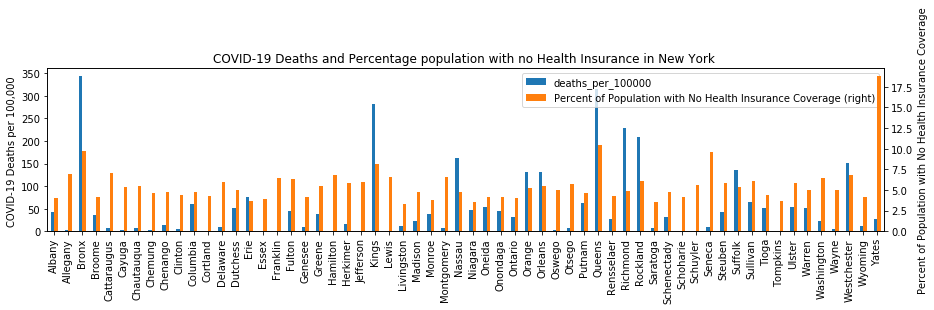

In [20]:
County_NewYork_df.plot.bar(figsize=(15,3), secondary_y= 'Percent of Population with No Health Insurance Coverage')
x_axis = np.arange(len(County_NewYork_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,County_NewYork_df["county_name_x"], rotation="vertical")
ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
ax1.set_ylabel('COVID-19 Deaths per 100,000 ')
ax2.set_ylabel('Percent of Population with No Health Insurance Coverage')
plt.title("COVID-19 Deaths and Percentage population with no Health Insurance in New York ")
plt.savefig("../Insurance Images/COVID-19 Deaths vs. No Health Insurance(%) New York Bar chart.png",bbox_inches="tight")

The p-value is: 9.82647770130023e-46
The r-value is: 0.2564281312395377


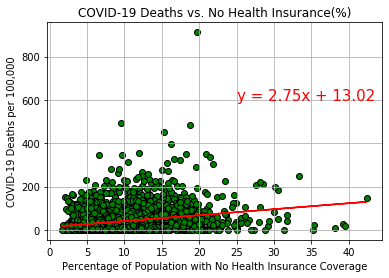

In [21]:
# Calculate correlation coefficient between percent population with no health insurance and deaths per 100000 people
# Calculate linear regression model
plt.scatter(merged_data['Percent of Population with No Health Insurance Coverage'], merged_data['deaths_per_100000'], color='green', edgecolor='black')
plt.title("COVID-19 Deaths vs. No Health Insurance(%)")
plt.xlabel("Percentage of Population with No Health Insurance Coverage")
plt.ylabel("COVID-19 Deaths per 100,000")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['Percent of Population with No Health Insurance Coverage'], 
                                                           merged_data['deaths_per_100000'])
regress_value = merged_data['Percent of Population with No Health Insurance Coverage'] * slope + intercept
plt.plot(merged_data['Percent of Population with No Health Insurance Coverage'], regress_value, 'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(25,600),fontsize=15,color="red")
plt.grid()
print(f'The p-value is: {pvalue}')
print(f'The r-value is: {rvalue}')    
# Save the plotted figure as .pngs
plt.savefig("../Insurance Images/COVID-19 Deaths vs. No Health Insurance(%).png")

The p-value is: 3.081410482868751e-77
The r-value is: 0.3320297290567676


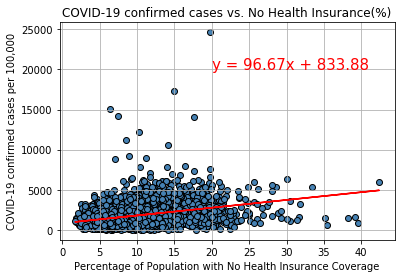

In [22]:
# Calculate correlation coefficient between percent population with no health insurance and confirmed cases per 100000 people
# Calculate linear regression model
plt.scatter(merged_data['Percent of Population with No Health Insurance Coverage'], merged_data['confirmed_per_100000'], color='steelblue', edgecolor='black')
plt.title("COVID-19 confirmed cases vs. No Health Insurance(%)")
plt.xlabel("Percentage of Population with No Health Insurance Coverage")
plt.ylabel("COVID-19 confirmed cases per 100,000")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['Percent of Population with No Health Insurance Coverage'], 
                                                           merged_data['confirmed_per_100000'])
regress_value = merged_data['Percent of Population with No Health Insurance Coverage'] * slope + intercept
plt.plot(merged_data['Percent of Population with No Health Insurance Coverage'], regress_value, 'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,20000),fontsize=15,color="red")
plt.grid()
print(f'The p-value is: {pvalue}')
print(f'The r-value is: {rvalue}')
# Save the plotted figure as .pngs
plt.savefig("../Insurance Images/COVID-19 confirmed cases vs. No Health Insurance(%).png")

The p-value is: 9.82647770130023e-46
The r-value is: 0.2564281312395377


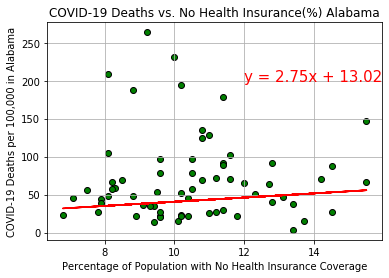

In [23]:
# Calculate correlation coefficient between percent population with no health insurance and deaths per 100000 people for Alabama
# Calculate linear regression model
plt.scatter(County_Alabama_df['Percent of Population with No Health Insurance Coverage'], County_Alabama_df['deaths_per_100000'], color='green', edgecolor='black')
plt.title("COVID-19 Deaths vs. No Health Insurance(%) Alabama")
plt.xlabel("Percentage of Population with No Health Insurance Coverage")
plt.ylabel("COVID-19 Deaths per 100,000 in Alabama")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_data['Percent of Population with No Health Insurance Coverage'], 
                                                           merged_data['deaths_per_100000'])
regress_value = County_Alabama_df['Percent of Population with No Health Insurance Coverage'] * slope + intercept
plt.plot(County_Alabama_df['Percent of Population with No Health Insurance Coverage'], regress_value, 'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(12,200),fontsize=15,color="red")
plt.grid()
print(f'The p-value is: {pvalue}')
print(f'The r-value is: {rvalue}')
plt.savefig("../Insurance Images/COVID-19 Deaths vs. No Health Insurance(%) Alabama.png")


The p-value is: 0.025348505561768778
The r-value is: 0.28857186730196116


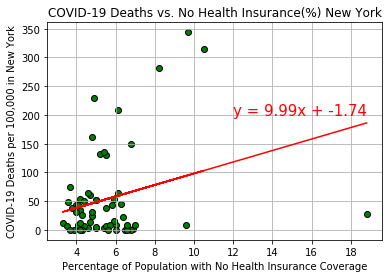

In [24]:
# Calculate correlation coefficient between percent population with no health insurance and deaths per 100000 people for Alabama
# Calculate linear regression model
plt.scatter(County_NewYork_df['Percent of Population with No Health Insurance Coverage'], County_NewYork_df['deaths_per_100000'], color='green', edgecolor='black')
plt.title("COVID-19 Deaths vs. No Health Insurance(%) New York")
plt.xlabel("Percentage of Population with No Health Insurance Coverage")
plt.ylabel("COVID-19 Deaths per 100,000 in New York")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(County_NewYork_df['Percent of Population with No Health Insurance Coverage'], 
                                                           County_NewYork_df['deaths_per_100000'])
regress_value = County_NewYork_df['Percent of Population with No Health Insurance Coverage'] * slope + intercept
plt.plot(County_NewYork_df['Percent of Population with No Health Insurance Coverage'], regress_value, 'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(12,200),fontsize=15,color="red")
plt.grid()
print(f'The p-value is: {pvalue}')
print(f'The r-value is: {rvalue}')
plt.savefig("../Insurance Images/COVID-19 Deaths vs. No Health Insurance(%) New York.png")